# 프로젝트 : 나랑 닮은 연예인을 찾아보자

### Step1. 사진 모으기
- 사진을 모을 때는 파일명을 가급적으로 장동건.jpg, 김태의.png와 같이 파일명이 사람 이름이 들어 있도록 하는 것이 좋다.

#### 1. 내 사진 찍기
- 내 사진을 2장 이상을 포함한다.
- 내 사진들끼의 얼굴 임베딩 벡터 거리를 구해 본다. 닮았음을 확인할 수 있는 좋은 베이스라인이 될 수 있다.
- 혹시 내 사진들끼리의 거리가 멀게 나온다면 왜 그럴지 생각해봐야한다.

#### 2. 비교할 연예인 사진 모으기

- 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아진다.
- 주위의 동료들고 모은 사진을 주고받는 것도 하나의 방법이다.


In [2]:
# 라이브러리 불러오기
import os
import face_recognition
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [3]:
# 내 사진 3장 + 셀럽사진 70장
dir_path = os.getenv('HOME') + '/aiffel/face_embedding/images_pj'
file_list = os.listdir(dir_path)

print("이미지 파일 개수:", len(file_list))

이미지 파일 개수: 73


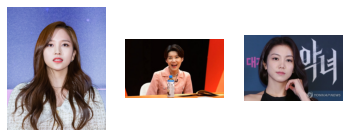

In [4]:
# 어떤 얼굴들이 있는지 랜덤하게 출력해보기
import random
import PIL

rand_file = random.sample(file_list, 3)

for idx, file in enumerate(rand_file):
    img_path = os.path.join(dir_path, file)
    
    image = PIL.Image.open(img_path)
    
    plt.subplot(1, 3, idx+1)
    plt.axis('off')
    plt.imshow(image)

### Step2. 얼굴 영역 자르기
- 이미지 속에서 얼굴 영역만을 정확하게 인식해서 추출해 내는 작업이 필요하다.

[(27, 384, 348, 63)]


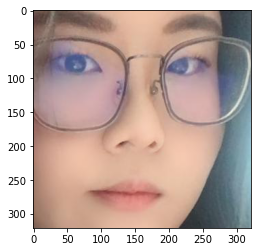

In [5]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_pj/jee_02.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

#### 이미지 파일 경로로 파라미터로 넘기면 얼굴 영역만 잘서라서 뿌려주는 함수

In [6]:
import face_recognition
import os

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

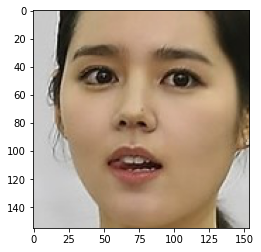

In [7]:
#위 함수가 잘 만들어 졌는지 확인하는 단계
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images_pj/GIHan.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

### Step3. 얼굴 영역의 임베딩 추출하기

- 잘린 이미지를 face_recognition을 사용해서 이미지를 불러 오고 임베딩을 추출
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [8]:
#파일 리스트 불러오기
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images_pj'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['SiYPark.jpg', 'SoyeonKim.jpg', 'YShan.jpg', 'jee_04.jpg', 'BYPark.jpg', '조이.jpg', 'OkbinKim.jpg', 'MinaKang.jpg', '윤아.jpg', 'EHPark.jpg', '장도연.jpg', 'MYPark.jpg', 'CAHan.jpg', 'GIHan.jpg', 'DamiKim.png', 'SungryeongKim.jpg', 'KoeunKim.jpg', 'SDPark.jpg', 'SHHan2.jpg', '이효리.jpg', 'hyoju.jpg', 'YASong.jpg', 'DasolKim.jpg', 'SMPark.jpg', 'ShinHPark.jpg', '트와이스미나.jpg', 'DBSon.jpg', 'JHSong.jpg', '티파니.jpg', 'SunYeongKim.jpg', 'JAPark.jpg', 'SYHan.jpg', 'HMPark.jpg', 'YewonKim.jpg', 'SHPark.jpg', 'HJHan.jpg', 'jee_02.jpg', 'SJPark.png', '트와이스사나.jpg', 'SHHan.jpg', 'SeulkiKim.jpg', '잇지예지.jpeg', 'YRPark.jpg', 'jee_03.jpg', '트와이스쯔위.jpg', 'YJSon.jpg', 'SunAhKim.jpg', 'EJHan.jpg', '장원영.jpeg', 'JHHan.jpg', 'TYSon.jpg', 'JHHan2.jpg', 'HGSong.jpg', 'JMPark.jpg', 'SRKim3.jpg', 'NESon.jpg', 'NamjooKim.jpg', '트와이스정연.jpg', 'JYPark.jpg', 'SaeronKim.jpg', '.ipynb_checkpoints', 'HJPark.jpg', 'SoeunKim.jpg', 'SYKim.png', 'JIYPark.jpg', 'SungeunKim.jpg', 'HBPark.jpg', 'SuhyeongHKim.jpg', 'JJPark.

In [9]:
image_file = os.path.join(dir_path, '지수.jpg') #지수.jpg에 포함된 얼굴 영역의 임베딩 벡터 구하기
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.06305234,  0.03530454,  0.02024697, -0.09041553, -0.09140371,
        -0.05707049, -0.09385347, -0.08336317,  0.09381115, -0.17337656,
         0.17177035, -0.1214564 , -0.23515114, -0.01618576, -0.06647193,
         0.24340744, -0.18340747, -0.14955623, -0.03262156,  0.02747447,
         0.0848883 ,  0.03184735,  0.01249368,  0.09015942, -0.11810566,
        -0.31331831, -0.12197819, -0.03327901, -0.0803624 , -0.10126132,
        -0.06829531, -0.00625166, -0.17289205,  0.02031762,  0.01896438,
         0.09704788, -0.03244245, -0.11699821,  0.17370547,  0.05856109,
        -0.26509258,  0.07144412,  0.06947191,  0.25550637,  0.17888772,
         0.00502469, -0.00827157, -0.18867739,  0.10650321, -0.21680944,
         0.03984455,  0.09520891,  0.01926193,  0.05973183, -0.00772566,
        -0.08400758,  0.0741787 ,  0.19166973, -0.18936113,  0.02771636,
         0.11571764, -0.05727357, -0.01930992, -0.10504165,  0.22345726,
         0.09049077, -0.14752029, -0.21071178,  0.0

###  images_pj 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수
#### 임베딩 딕셔너리 구하기


In [15]:
# dict = {사람 이름: 임베딩 벡터}
def get_embedding_dict(file_list):
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        name = os.path.splitext(file)[0]
        
        # 이미지 파일이 아닌 파일은 거른다
        if img_path.endswith('.ipynb_checkpoints'):
            continue
        # 이미 저장되어 있는 임베딩은 다시 갱신하지 않는다
        elif name in embedding_dict:
            continue
        # 나머지 이미지의 embedding을 구해서 딕셔너리에 추가한다
        else:
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)    
            
            # 임베딩이 잘 된 경우
            if embedding:
                # 확장자를 제거한 이름을 key로, 임베딩 벡터 값을 value로 딕셔너리에 추가
                embedding_dict[name] = embedding[0]
            # 임베딩에 실패한 경우
            else:
                print("제외된 이미지:", name)   # 임베딩에 실패한 이미지는 제외하고, 그 이름을 출력
                continue
            
    return embedding_dict

In [16]:
# 임베딩 값을 딕셔너리로 만들고, 제외된 이미지들을 출력
embedding_dict = get_embedding_dict(file_list)
embedding_dict['BYPark']

array([-0.101844  ,  0.09912028,  0.05259124, -0.10715101, -0.14025266,
        0.04309171, -0.04105221, -0.1419962 ,  0.12559193, -0.17937617,
        0.21483514, -0.12471483, -0.21942192, -0.02999959, -0.03505245,
        0.26157668, -0.18799883, -0.16772911, -0.03353583,  0.00723528,
        0.06315134,  0.03678843, -0.00248143,  0.06836098, -0.1322315 ,
       -0.3617034 , -0.10193934, -0.07317959, -0.05601612, -0.05153536,
       -0.05040158,  0.03836679, -0.17712203, -0.02208114,  0.02654649,
        0.07658492,  0.01604917, -0.13297524,  0.14506745,  0.00655382,
       -0.26542959,  0.07604564,  0.12463109,  0.1891796 ,  0.12587281,
        0.03958343,  0.0234565 , -0.14275773,  0.14493574, -0.19272153,
       -0.00195088,  0.03924633,  0.0521911 ,  0.00059914,  0.0230842 ,
       -0.15584937,  0.03608546,  0.13835923, -0.15631008,  0.01083254,
        0.10688115, -0.04402363,  0.01481042, -0.11657671,  0.23388207,
        0.12180145, -0.06470155, -0.19596829,  0.17281672, -0.10

### 내 사진 비교하기

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(get_distance('jee_02', 'jee_03'))
print(get_distance('jee_03', 'jee_04'))

0.44101753389315373
0.3449633083555536


In [17]:
def get_nearest_face(name, top=5): 
    pass
get_nearest_face('jee_02')

In [30]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('jee_02')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [19]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('jee_02',
  array([-5.32122515e-02,  1.22966863e-01,  7.97627419e-02, -8.38509127e-02,
         -1.50143534e-01, -2.52058860e-02, -1.45367980e-01, -1.26602903e-01,
          1.11698821e-01, -1.50665179e-01,  2.37113699e-01, -1.14343829e-01,
         -2.23521888e-01, -4.56281863e-02, -6.38029426e-02,  2.48142034e-01,
         -2.15613008e-01, -1.35768324e-01,  2.10278407e-02,  1.78161971e-02,
          2.02892181e-02, -2.50656456e-02,  3.97723773e-03,  9.09427553e-02,
         -9.29653645e-02, -3.70426297e-01, -9.96917710e-02, -7.17954636e-02,
         -3.69315743e-02, -9.47854146e-02, -3.70469093e-02,  6.57395720e-02,
         -1.66793749e-01,  2.29559541e-02,  2.96443887e-03,  9.79617611e-02,
         -1.19404672e-02, -1.54273152e-01,  1.31796867e-01, -2.14578584e-02,
         -2.94207633e-01,  8.91569071e-03,  4.89710942e-02,  2.31491163e-01,
          1.67476013e-01, -5.28177023e-02,  4.73687649e-02, -1.48561969e-01,
          7.88629949e-02, -1.61507696e-01, -1.53150558e-02,  1.4

## Step4. 모은 연예인들과 비교하기

In [48]:

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if i == 1: 
            continue 
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

### 자신과 닮은 연예인 닮은 꼴 순위

In [55]:
# 가장 닮은 사람은 누굴까요?
get_nearest_face('jee_02')

순위 2 : 이름(MYPark), 거리(0.41594697672329867)
순위 3 : 이름(SYHan), 거리(0.42327097326775426)
순위 4 : 이름(SYPark), 거리(0.423537259324287)
순위 5 : 이름(SoyeonKim), 거리(0.4255374051736003)


In [53]:
get_nearest_face('jee_03')

순위 2 : 이름(윤아), 거리(0.4362165815780002)
순위 3 : 이름(jee_02), 거리(0.44101753389315373)
순위 4 : 이름(JIYPark), 거리(0.45729342162387776)
순위 5 : 이름(SYHan), 거리(0.4608699209347108)


In [54]:
get_nearest_face('jee_04')

순위 2 : 이름(DamiKim), 거리(0.4027336853263679)
순위 3 : 이름(윤아), 거리(0.41202276627407225)
순위 4 : 이름(SunAhKim), 거리(0.41823677609183874)
순위 5 : 이름(SYHan), 거리(0.4202493597143866)


### 이미지 겹쳐서 확인해보기

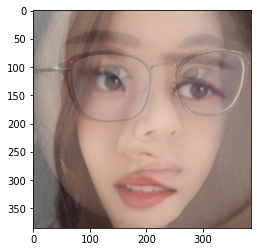

In [75]:
# 겹칠 이미지 불러오기
img1_path = os.path.join(dir_path, 'jee_03.jpg')
img2_path = os.path.join(dir_path, 'MYPark.jpg')

# 비교를 위해 얼굴 영역만 자르기
img1 = get_cropped_face(img1_path)
img2 = get_cropped_face(img2_path)

# 이미지 사이즈 맞춰주기
w = img1.shape[1]
h = img1.shape[0]
img2 = cv2.resize(img2, (w, h))

weighted = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(weighted)

## 생각정리 및 아쉬운 점 정리

- 이미지를 자르는 부분에서는 앞에서 진행을 해서 어렵지 않게 진행을 했었다.하지만 이미지를 모으고 처리하는 과정에서 한 저장 공간에 넣어야 하는지 또는 분리를 해서 넣어야 하는지 고민을 정말 고민을 했었다. 고민을 한 결과 두가지를 진행을 했었는데 자신의 이미지와 연예인 이미지를 나눠서 넣었을 때  모든 과정을 두번 거쳐야 되는 부분도 있었고 이미지의 경로가 다르다 보니 경로가 인식되지 않아서 오류가 생기는 경우도 많았다. 
- 이번 노드를 하면서 점점 쉽지 않구나라는 것을 느끼게 되었고, 하면할 수록 더 모르겠어서 멘붕이 오기도 했다.
- 아직 함수를 어떻게, 어떤 상황에서 써야 햐는지 몰라서 이러한 부분을 설명해주는 부분이 노드에 있었으면 했다. 이러한 부분을 스스로 공부해야겠다는 생각도 많이 들었다.

